# 02_host_virus_assoc_summary

This document explores how many MAGs are connected to viral contigs/vMAGs and how to define strong vs weak linkages. Imported data is the original data files from google drive and the all_host_associations csv file from 01_all_host_association_script. This Rmd file is written in the R coding language.

## Load packages and data

In [48]:
import pandas as pd
import os
import os.path as op
import sys
import csv
import numpy as np
import matplotlib
import glob
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

m_path = '/Users/melissaherring/Google Drive/My Drive/MH_project/'
#j_path = '/Users/juliabrown/Google Drive/My Drive/projects/OMZvir_round2/MH_project/'

# from 01_create_proximeta_associations_table:
vmag_assoc = pd.read_csv(op.join(m_path, 'tables/proximeta_associations_table.csv'))

jv119_vmag_sum = pd.read_csv(op.join(m_path,'data/proximeta_viral_files/jv-119_proximeta/viral_MAGs/viral_mags_summary.tsv'), sep = '\t')
jv121_vmag_sum = pd.read_csv(op.join(m_path,'data/proximeta_viral_files/jv-121_proximeta/viral_MAGs/viral_mags_summary.tsv'), sep = '\t')
jv132_vmag_sum = pd.read_csv(op.join(m_path,'data/proximeta_viral_files/jv-132_proximeta/viral_MAGs/viral_mags_summary.tsv'), sep = '\t')
jv154_vmag_sum = pd.read_csv(op.join(m_path, 'data/proximeta_viral_files/jv-119_proximeta/viral_MAGs/viral_mags_summary.tsv'), sep = '\t')

sag_sum = pd.read_csv(op.join(m_path,'data/sag_data/MPvsag_info_230818.csv'))

sag_gtdb = pd.read_csv(op.join(m_path,'data/sag_data/MPsag_mx2_proximeta_matches_gtdbtk.csv'))

## How many MAGs are connected to viral contigs/vMAGs?

### How many per sample?

In [9]:
vmag_assoc[vmag_assoc['virus_type'] == 'contig'].groupby('sample_name', as_index=False)['virus_name'].count()

,sample_name,virus_name
0,JV119,90
1,JV121,77
2,JV132,81
3,JV154,47


In [10]:
vmag_assoc[vmag_assoc['virus_type'] == 'vMAG'].groupby('sample_name', as_index=False)['virus_name'].count()

,sample_name,virus_name
0,JV119,7
1,JV121,10
2,JV132,15
3,JV154,9


### How many total?

In [8]:
vmag_assoc.groupby('virus_type', as_index=False)['virus_name'].count()

,virus_type,virus_name
0,contig,295
1,vMAG,41


## Plots- Distribution of adjusted_inter_vs_intra_ratio 

In [11]:
jv119_contig = vmag_assoc.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV119', 'contig'))
jv119_vMAG = vmag_assoc.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV119', 'vMAG'))

jv121_contig = vmag_assoc.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV121', 'contig'))
jv121_vMAG = vmag_assoc.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV121', 'vMAG'))

jv132_contig = vmag_assoc.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV132', 'contig'))
jv132_vMAG = vmag_assoc.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV132', 'vMAG'))

jv154_contig = vmag_assoc.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV154', 'contig'))
jv154_vMAG = vmag_assoc.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV154', 'vMAG'))

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex=True, sharey=True)

sns.histplot(jv119_contig['adjusted_inter_vs_intra_ratio'],ax= axes[0], bins=10, color='navy', edgecolor='black')
axes[0].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[0].set_ylabel('Frquency')
axes[0].set_title('JV119 Contigs')
axes[0].set_yscale('log')

sns.histplot(jv119_vMAG['adjusted_inter_vs_intra_ratio'], bins=10, color='skyblue', edgecolor='black', ax= axes[1])
axes[1].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[1].set_ylabel('Frquency')
axes[1].set_title('JV119 vMAGs')
axes[1].set_yscale('log')


fig.suptitle('JV119 Distribution of the Inter vs Intra Ratio',fontsize=16)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex=True, sharey=True)

sns.histplot(jv121_contig['adjusted_inter_vs_intra_ratio'],ax= axes[0], bins=10, color='firebrick', edgecolor='black')
axes[0].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[0].set_ylabel('Frquency')
axes[0].set_title('JV121 Contigs')
axes[0].set_yscale('log')

sns.histplot(jv121_vMAG['adjusted_inter_vs_intra_ratio'], bins=10, color='orangered', edgecolor='black', ax= axes[1])
axes[1].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[1].set_ylabel('Frquency')
axes[1].set_title('JV121 vMAGs')
axes[1].set_yscale('log')

fig.suptitle('JV121 Distribution of the Inter vs Intra Ratio',fontsize=16)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex=True, sharey=True)

sns.histplot(jv132_contig['adjusted_inter_vs_intra_ratio'],ax= axes[0], bins=10, color='darkgreen', edgecolor='black')
axes[0].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[0].set_ylabel('Frquency')
axes[0].set_title('JV132 Contigs')
axes[0].set_yscale('log')

sns.histplot(jv132_vMAG['adjusted_inter_vs_intra_ratio'], bins=10, color='limegreen', edgecolor='black', ax= axes[1])
axes[1].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[1].set_ylabel('Frquency')
axes[1].set_title('JV132 vMAGs')
axes[1].set_yscale('log')

fig.suptitle('JV132 Distribution of the Inter vs Intra Ratio',fontsize=16)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex=True, sharey=True)

sns.histplot(jv154_contig['adjusted_inter_vs_intra_ratio'],ax= axes[0], bins=10, color='indigo', edgecolor='black')
axes[0].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[0].set_ylabel('Frquency')
axes[0].set_title('JV154 Contigs')
axes[0].set_yscale('log')

sns.histplot(jv154_vMAG['adjusted_inter_vs_intra_ratio'], bins=10, color='mediumslateblue', edgecolor='black', ax= axes[1])
axes[1].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[1].set_ylabel('Frquency')
axes[1].set_title('JV154 vMAGs')
axes[1].set_yscale('log')

fig.suptitle('JV154 Distribution of the Inter vs Intra Ratio',fontsize=16)

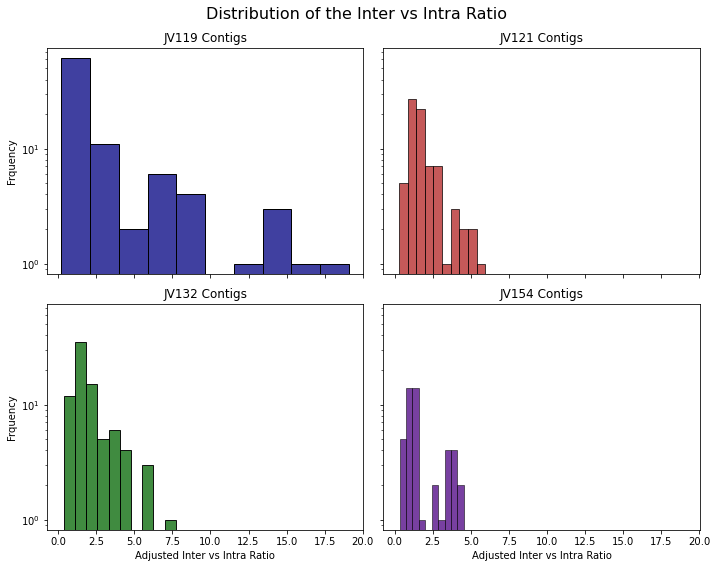

In [18]:
# plot all contigs together

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8), sharex=True, sharey=True)

sns.histplot(jv119_contig['adjusted_inter_vs_intra_ratio'],ax= axes[0,0], bins=10, color='navy', edgecolor='black')
axes[0,0].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[0,0].set_ylabel('Frquency')
axes[0,0].set_title('JV119 Contigs')
axes[0,0].set_yscale('log')

sns.histplot(jv121_contig['adjusted_inter_vs_intra_ratio'],ax= axes[0,1], bins=10, color='firebrick', edgecolor='black')
axes[0,1].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[0,1].set_ylabel('Frquency')
axes[0,1].set_title('JV121 Contigs')
axes[0,1].set_yscale('log')

sns.histplot(jv132_contig['adjusted_inter_vs_intra_ratio'],ax= axes[1,0], bins=10, color='darkgreen', edgecolor='black')
axes[1,0].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[1,0].set_ylabel('Frquency')
axes[1,0].set_title('JV132 Contigs')
axes[1,0].set_yscale('log')

sns.histplot(jv154_contig['adjusted_inter_vs_intra_ratio'],ax= axes[1,1], bins=10, color='indigo', edgecolor='black')
axes[1,1].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[1,1].set_ylabel('Frquency')
axes[1,1].set_title('JV154 Contigs')
axes[1,1].set_yscale('log')

fig.suptitle('Distribution of the Inter vs Intra Ratio',fontsize=16)
plt.tight_layout()

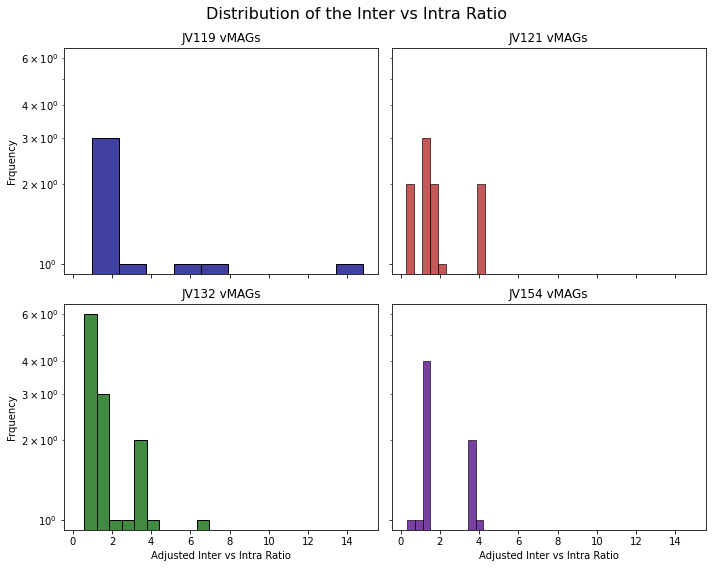

In [19]:
# plot all vMAGs together

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8), sharex=True, sharey=True)

sns.histplot(jv119_vMAG['adjusted_inter_vs_intra_ratio'],ax= axes[0,0], bins=10, color='navy', edgecolor='black')
axes[0,0].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[0,0].set_ylabel('Frquency')
axes[0,0].set_title('JV119 vMAGs')
axes[0,0].set_yscale('log')

sns.histplot(jv121_vMAG['adjusted_inter_vs_intra_ratio'],ax= axes[0,1], bins=10, color='firebrick', edgecolor='black')
axes[0,1].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[0,1].set_ylabel('Frquency')
axes[0,1].set_title('JV121 vMAGs')
axes[0,1].set_yscale('log')

sns.histplot(jv132_vMAG['adjusted_inter_vs_intra_ratio'],ax= axes[1,0], bins=10, color='darkgreen', edgecolor='black')
axes[1,0].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[1,0].set_ylabel('Frquency')
axes[1,0].set_title('JV132 vMAGs')
axes[1,0].set_yscale('log')

sns.histplot(jv154_vMAG['adjusted_inter_vs_intra_ratio'],ax= axes[1,1], bins=10, color='indigo', edgecolor='black')
axes[1,1].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[1,1].set_ylabel('Frquency')
axes[1,1].set_title('JV154 vMAGs')
axes[1,1].set_yscale('log')

fig.suptitle('Distribution of the Inter vs Intra Ratio',fontsize=16)
plt.tight_layout()

## Plots- Distribution of adjusted_inter_connective_linkage_density

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex=True, sharey=True)

sns.histplot(jv119_contig['adjusted_inter_linkage_density'],ax= axes[0], bins=10, color='navy', edgecolor='black')
axes[0].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[0].set_ylabel('Frquency')
axes[0].set_title('JV119 Contigs')
axes[0].set_yscale('log')

sns.histplot(jv119_vMAG['adjusted_inter_linkage_density'], bins=10, color='skyblue', edgecolor='black', ax= axes[1])
axes[1].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[1].set_ylabel('Frquency')
axes[1].set_title('JV119 vMAGs')
axes[1].set_yscale('log')

fig.suptitle('JV119 Distribution of the Inter Linkage Density',fontsize=16)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex=True, sharey=True)

sns.histplot(jv121_contig['adjusted_inter_linkage_density'],ax= axes[0], bins=10, color='firebrick', edgecolor='black')
axes[0].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[0].set_ylabel('Frquency')
axes[0].set_title('JV121 Contigs')
axes[0].set_yscale('log')

sns.histplot(jv121_vMAG['adjusted_inter_linkage_density'], bins=10, color='orangered', edgecolor='black', ax= axes[1])
axes[1].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[1].set_ylabel('Frquency')
axes[1].set_title('JV121 vMAGs')
axes[1].set_yscale('log')

fig.suptitle('JV119 Distribution of the Inter Linkage Density',fontsize=16)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex=True, sharey=True)

sns.histplot(jv132_contig['adjusted_inter_linkage_density'],ax= axes[0], bins=10, color='darkgreen', edgecolor='black')
axes[0].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[0].set_ylabel('Frquency')
axes[0].set_title('JV132 Contigs')
axes[0].set_yscale('log')

sns.histplot(jv132_vMAG['adjusted_inter_linkage_density'], bins=10, color='limegreen', edgecolor='black', ax= axes[1])
axes[1].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[1].set_ylabel('Frquency')
axes[1].set_title('JV132 vMAGs')
axes[1].set_yscale('log')

fig.suptitle('JV132 Distribution of the Inter Linkage Density',fontsize=16)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex=True, sharey=True)

sns.histplot(jv154_contig['adjusted_inter_linkage_density'],ax= axes[0], bins=10, color='indigo', edgecolor='black')
axes[0].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[0].set_ylabel('Frquency')
axes[0].set_title('JV154 Contigs')
axes[0].set_yscale('log')

sns.histplot(jv154_vMAG['adjusted_inter_linkage_density'], bins=10, color='mediumslateblue', edgecolor='black', ax= axes[1])
axes[1].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[1].set_ylabel('Frquency')
axes[1].set_title('JV154 vMAGs')
axes[1].set_yscale('log')

fig.suptitle('JV154 Distribution of the Inter Linkage Density',fontsize=16)

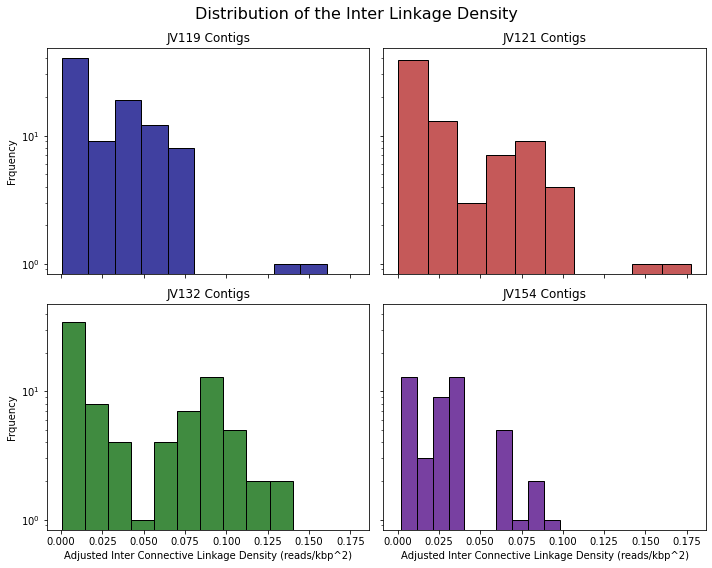

In [21]:
# plot all contigs together

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8), sharex=True, sharey=True)

sns.histplot(jv119_contig['adjusted_inter_linkage_density'],ax= axes[0,0], bins=10, color='navy', edgecolor='black')
axes[0,0].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[0,0].set_ylabel('Frquency')
axes[0,0].set_title('JV119 Contigs')
axes[0,0].set_yscale('log')

sns.histplot(jv121_contig['adjusted_inter_linkage_density'],ax= axes[0,1], bins=10, color='firebrick', edgecolor='black')
axes[0,1].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[0,1].set_ylabel('Frquency')
axes[0,1].set_title('JV121 Contigs')
axes[0,1].set_yscale('log')

sns.histplot(jv132_contig['adjusted_inter_linkage_density'],ax= axes[1,0], bins=10, color='darkgreen', edgecolor='black')
axes[1,0].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[1,0].set_ylabel('Frquency')
axes[1,0].set_title('JV132 Contigs')
axes[1,0].set_yscale('log')

sns.histplot(jv154_contig['adjusted_inter_linkage_density'],ax= axes[1,1], bins=10, color='indigo', edgecolor='black')
axes[1,1].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[1,1].set_ylabel('Frquency')
axes[1,1].set_title('JV154 Contigs')
axes[1,1].set_yscale('log')

fig.suptitle('Distribution of the Inter Linkage Density',fontsize=16)
plt.tight_layout()


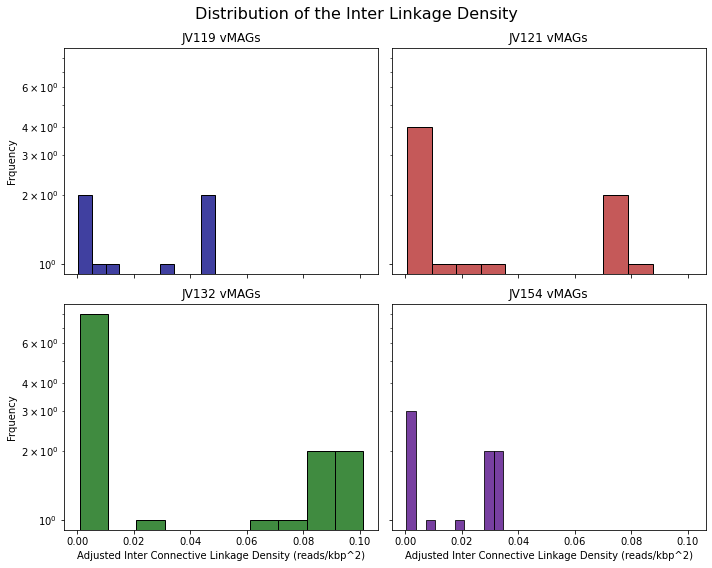

In [23]:
# plot all vMAGs together

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8), sharex=True, sharey=True)

sns.histplot(jv119_vMAG['adjusted_inter_linkage_density'], bins=10, color='navy', edgecolor='black', ax= axes[0,0])
axes[0,0].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[0,0].set_ylabel('Frquency')
axes[0,0].set_title('JV119 vMAGs')
axes[0,0].set_yscale('log')

sns.histplot(jv121_vMAG['adjusted_inter_linkage_density'], bins=10, color='firebrick', edgecolor='black', ax= axes[0,1])
axes[0,1].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[0,1].set_ylabel('Frquency')
axes[0,1].set_title('JV121 vMAGs')
axes[0,1].set_yscale('log')

sns.histplot(jv132_vMAG['adjusted_inter_linkage_density'], bins=10, color='darkgreen', edgecolor='black', ax= axes[1,0])
axes[1,0].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[1,0].set_ylabel('Frquency')
axes[1,0].set_title('JV132 vMAGs')
axes[1,0].set_yscale('log')

sns.histplot(jv154_vMAG['adjusted_inter_linkage_density'], bins=10, color='indigo', edgecolor='black', ax= axes[1,1])
axes[1,1].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[1,1].set_ylabel('Frquency')
axes[1,1].set_title('JV154 vMAGs')
axes[1,1].set_yscale('log')

fig.suptitle('Distribution of the Inter Linkage Density',fontsize=16)
plt.tight_layout()

## Viral Copies per Cell

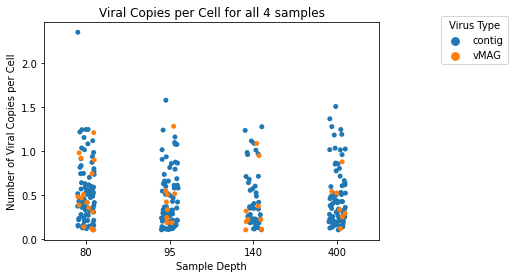

In [24]:
sns.stripplot(x='sample_depth', y='viral_copies_per_cell', data=vmag_assoc, jitter=True, hue='virus_type')
plt.xlabel('Sample Depth')
plt.ylabel('Number of Viral Copies per Cell')
plt.title('Viral Copies per Cell for all 4 samples')
plt.legend(bbox_to_anchor=(1.4, 1.05),title='Virus Type')

Text(0.5, 1.0, 'vMAGs Boxplot of Viral Copies per Cell')

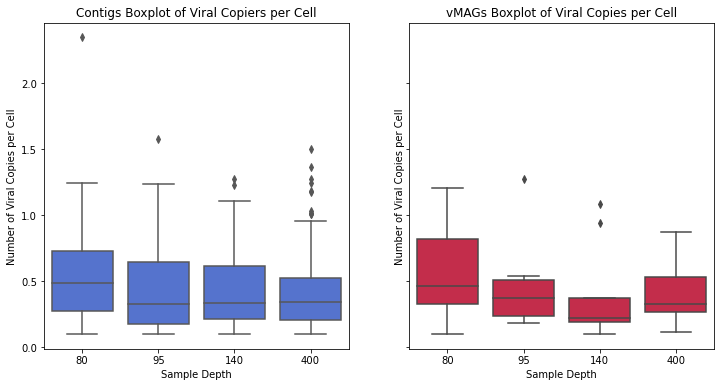

In [25]:
contigs = vmag_assoc.groupby('virus_type', as_index=False).get_group('contig')
vMAGs = vmag_assoc.groupby('virus_type', as_index=False).get_group('vMAG')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex=True, sharey=True)

sns.boxplot(x='sample_depth', y='viral_copies_per_cell', data=contigs, color='royalblue', ax=axes[0])
axes[0].set_xlabel('Sample Depth')
axes[0].set_ylabel('Number of Viral Copies per Cell')
axes[0].set_title('Contigs Boxplot of Viral Copiers per Cell')

sns.boxplot(x='sample_depth', y='viral_copies_per_cell', data=vMAGs, color='crimson', ax=axes[1])
axes[1].set_xlabel('Sample Depth')
axes[1].set_ylabel('Number of Viral Copies per Cell')
axes[1].set_title('vMAGs Boxplot of Viral Copies per Cell')

## Number of Associated vMAGs and the Total Number of viral MAGs

In [62]:
vmags = vmag_assoc.groupby('virus_type', as_index=False).get_group('vMAG')
sample_depth = [80,95,140,400]
vmag_assoc_count = pd.DataFrame(vmags['sample_depth'].value_counts())
vmag_assoc_count.rename(columns={'sample_depth': 'count'}, inplace=True)
vmag_assoc_count['sample_depth'] = sample_depth
vmag_assoc_count['type'] = 'vMAGs connected to a Host'

vmag_tot = pd.DataFrame([len(jv119_vmag_sum), len(jv121_vmag_sum), len(jv132_vmag_sum), len(jv154_vmag_sum)])
vmag_tot.rename(columns={0: 'count'}, inplace=True)
vmag_tot = pd.DataFrame(pd.concat([vmag_tot,pd.DataFrame(sample_depth)],axis=1))
vmag_tot.rename(columns={0: 'sample_depth'}, inplace=True)
vmag_tot['type'] = 'Total vMAGs'

combo1 = pd.concat([vmag_assoc_count,vmag_tot])

In [36]:
vmag_tot

,count,sample_depth,type
0,36,80,Total vMAGs
1,77,95,Total vMAGs
2,75,140,Total vMAGs
3,36,400,Total vMAGs


In [37]:
vmag_assoc_count

,count,sample_depth,type
80,15,80,vMAGs connected to a Host
95,10,95,vMAGs connected to a Host
140,9,140,vMAGs connected to a Host
400,7,400,vMAGs connected to a Host


Text(0.5, 1.0, 'Number of Total Viral MAGs per Sample')

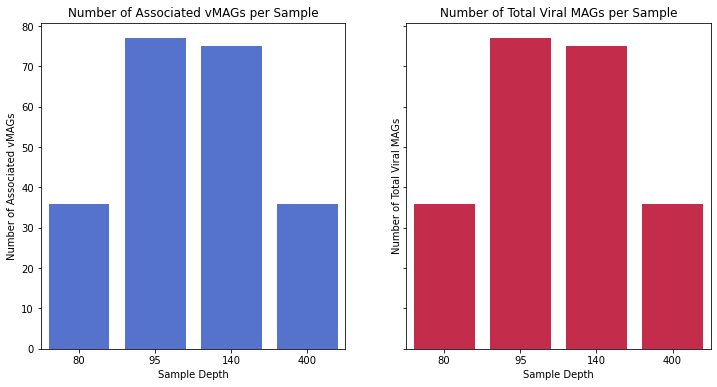

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex=True, sharey=True)

sns.barplot(x='sample_depth', y='count', data=len_vmag_df, color='royalblue', ax=axes[0])
axes[0].set_xlabel('Sample Depth')
axes[0].set_ylabel('Number of Associated vMAGs')
axes[0].set_title('Number of Associated vMAGs per Sample')

sns.barplot(x='sample_depth', y='count', data=len_vmag_df, color='crimson', ax=axes[1])
axes[1].set_xlabel('Sample Depth')
axes[1].set_ylabel('Number of Total Viral MAGs')
axes[1].set_title('Number of Total Viral MAGs per Sample')

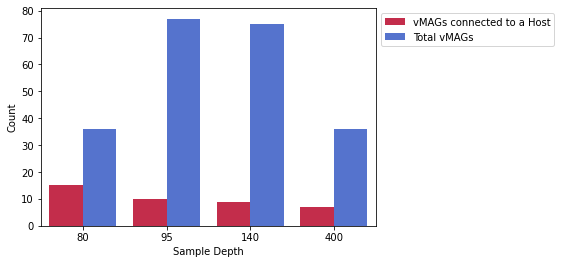

In [63]:
custom_palette1 = ['crimson','royalblue']

sns.barplot(x="sample_depth", y="count", hue="type", data=combo1, palette=custom_palette1)
plt.xlabel('Sample Depth')
plt.ylabel('Count')
plt.legend(title='',loc='upper left', bbox_to_anchor=(1, 1))

In [67]:
sample_depth = [80,95,140,400]
sag_assoc_count = pd.DataFrame(sag_sum['depth'].value_counts())
sag_assoc_count.rename(columns={'depth': 'count'}, inplace=True)
sag_assoc_count['sample_depth'] = sample_depth
sag_assoc_count['type'] = 'vSAGs connected to a Host'

vsag_tot = pd.DataFrame([len(sag_gtdb[sag_gtdb['depth'] == 80]), len(sag_gtdb[sag_gtdb['depth'] == 95]), len(sag_gtdb[sag_gtdb['depth'] == 140]), len(sag_gtdb[sag_gtdb['depth'] == 400])])
vsag_tot.rename(columns={0: 'count'}, inplace=True)
vsag_tot = pd.DataFrame(pd.concat([vsag_tot,pd.DataFrame(sample_depth)],axis=1))
vsag_tot.rename(columns={0: 'sample_depth'}, inplace=True)
vsag_tot['type'] = 'Total vSAGs'

combo2 = pd.concat([sag_assoc_count,vsag_tot])

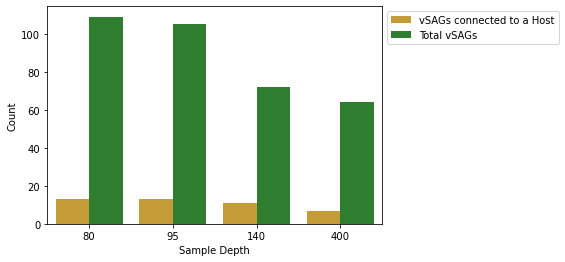

In [75]:
custom_palette2 = ['goldenrod','forestgreen']

sns.barplot(x="sample_depth", y="count", hue="type", data=combo2, palette=custom_palette2)
plt.xlabel('Sample Depth')
plt.ylabel('Count')
plt.legend(title='',loc='upper left', bbox_to_anchor=(1, 1))

Text(0, 0.5, 'Count')

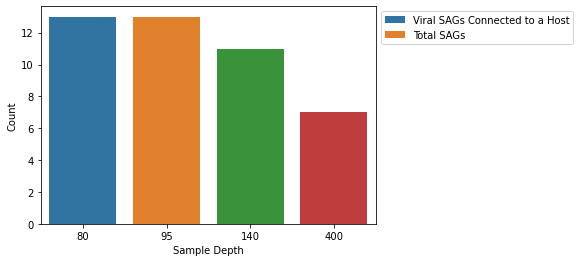

In [15]:
sags_count = pd.DataFrame(sags_viruses['depth'].value_counts())
sags_count.rename(columns={'depth': 'count'}, inplace=True)
sample_depth = [80,95,140,400]
sags_count['sample_depth'] = sample_depth

sns.barplot(x="sample_depth", y="count", data=sags_count)
plt.xlabel('Sample Depth')
plt.ylabel('Count')